# WHO analysis of e-cigarette use in adults and adolescents
---

In [159]:
# Import Dependencies
import json
import requests
# from config import api_key_tomtom, api_key_openchargemap
# import pandasdmx as sdmx
from pprint import pprint
import pandas as pd
from pathlib import Path
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Search for indicator names by filter, referring to https://www.who.int/data/gho/info/gho-odata-api documentation

# response = requests.get("https://ghoapi.azureedge.net/api/Dimension")
# response.json()

# # https://www.who.int/data/gho/info/gho-odata-api
# response = requests.get("https://ghoapi.azureedge.net/api/Indicator").json()
# pprint(response)

# # response.keys()

# response = requests.get("https://ghoapi.azureedge.net/api/Indicator?$filter=contains(IndicatorName,'Household')").json()
# pprint(response)

# Find all datasets related with cigarette in the indicator name
# cig_response = requests.get("https://ghoapi.azureedge.net/api/Indicator?$filter=contains(IndicatorName,'cigarette')").json()
# pprint(cig_response)
ecig_response = requests.get("https://ghoapi.azureedge.net/api/Indicator?$filter=contains(IndicatorName,'e-cig')").json()
pprint(ecig_response)
# Then read through and find datasets related to e-cigarettes

# response = requests.get(
#     "https://ghoapi.azureedge.net/api/Indicator?$filter=IndicatorName eq 'Prevalence of current e-cigarette use among adults (%)'").json()
# response

{'@odata.context': 'https://ghoapi.azureedge.net/api/$metadata#Indicator',
 'value': [{'IndicatorCode': 'Adult_curr_e-cig',
            'IndicatorName': 'Prevalence of current e-cigarette use among '
                             'adults (%)',
            'Language': 'EN'},
           {'IndicatorCode': 'Yth_daily_e-cig',
            'IndicatorName': 'Prevalence of daily e-cigarette use among '
                             'adolescents (%)',
            'Language': 'EN'},
           {'IndicatorCode': 'Adult_daily_e-cig',
            'IndicatorName': 'Prevalence of daily e-cigarette use among adults '
                             '(%)',
            'Language': 'EN'},
           {'IndicatorCode': 'Yth_curr_e-cig',
            'IndicatorName': 'Prevalence of current e-cigarette use among '
                             'adolescents (%)',
            'Language': 'EN'}]}


In [3]:
# https://www.who.int/data/gho/info/gho-odata-api
base_url = 'https://ghoapi.azureedge.net/api/'
indicator_name = 'Adult_curr_e-cig'

response1 = requests.get(base_url + indicator_name)
response1

<Response [200]>

In [5]:
# Get data in json format
adult_curr_ecig = response1.json()
pprint(adult_curr_ecig)

{'@odata.context': 'https://ghoapi.azureedge.net/api/$metadata#Adult_curr_e-cig',
 'value': [{'Comments': None,
            'DataSourceDim': None,
            'DataSourceDimType': None,
            'Date': '2023-12-07T16:57:17+01:00',
            'Dim1': 'SEX_BTSX',
            'Dim1Type': 'SEX',
            'Dim2': None,
            'Dim2Type': None,
            'Dim3': None,
            'Dim3Type': None,
            'High': None,
            'Id': 3355339,
            'IndicatorCode': 'Adult_curr_e-cig',
            'Low': None,
            'NumericValue': None,
            'ParentLocation': 'Americas',
            'ParentLocationCode': 'AMR',
            'SpatialDim': 'DOM',
            'SpatialDimType': 'COUNTRY',
            'TimeDim': 2007,
            'TimeDimType': 'YEAR',
            'TimeDimensionBegin': '2007-01-01T00:00:00+01:00',
            'TimeDimensionEnd': '2007-12-31T00:00:00+01:00',
            'TimeDimensionValue': '2007',
            'Value': 'Data not available'}

In [6]:
# Search for keys (visual inspection showed dictionary datatype)
adult_curr_ecig.keys()

dict_keys(['@odata.context', 'value'])

In [7]:
# Get all data in 'value' key
adult_curr_ecig_data = adult_curr_ecig['value']
adult_curr_ecig_data

[{'Id': 3355339,
  'IndicatorCode': 'Adult_curr_e-cig',
  'SpatialDimType': 'COUNTRY',
  'SpatialDim': 'DOM',
  'TimeDimType': 'YEAR',
  'ParentLocationCode': 'AMR',
  'ParentLocation': 'Americas',
  'Dim1Type': 'SEX',
  'Dim1': 'SEX_BTSX',
  'TimeDim': 2007,
  'Dim2Type': None,
  'Dim2': None,
  'Dim3Type': None,
  'Dim3': None,
  'DataSourceDimType': None,
  'DataSourceDim': None,
  'Value': 'Data not available',
  'NumericValue': None,
  'Low': None,
  'High': None,
  'Comments': None,
  'Date': '2023-12-07T16:57:17+01:00',
  'TimeDimensionValue': '2007',
  'TimeDimensionBegin': '2007-01-01T00:00:00+01:00',
  'TimeDimensionEnd': '2007-12-31T00:00:00+01:00'},
 {'Id': 5444620,
  'IndicatorCode': 'Adult_curr_e-cig',
  'SpatialDimType': 'COUNTRY',
  'SpatialDim': 'PAN',
  'TimeDimType': 'YEAR',
  'ParentLocationCode': 'AMR',
  'ParentLocation': 'Americas',
  'Dim1Type': 'SEX',
  'Dim1': 'SEX_MLE',
  'TimeDim': 2019,
  'Dim2Type': None,
  'Dim2': None,
  'Dim3Type': None,
  'Dim3': None,

In [8]:
# Turn data into dataframe
adult_curr_ecig_df = pd.DataFrame(adult_curr_ecig_data)
adult_curr_ecig_df

,Id,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,ParentLocationCode,ParentLocation,Dim1Type,Dim1,TimeDim,...,DataSourceDim,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
0,3355339,Adult_curr_e-cig,COUNTRY,DOM,YEAR,AMR,Americas,SEX,SEX_BTSX,2007,...,None,Data not available,NaN,None,None,None,2023-12-07T16:57:17+01:00,2007,2007-01-01T00:00:00+01:00,2007-12-31T00:00:00+01:00
1,5444620,Adult_curr_e-cig,COUNTRY,PAN,YEAR,AMR,Americas,SEX,SEX_MLE,2019,...,None,0.8,0.8,None,None,None,2023-12-07T16:56:44+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00
2,4204665,Adult_curr_e-cig,COUNTRY,IDN,YEAR,SEAR,South-East Asia,SEX,SEX_MLE,2021,...,None,5.8,5.8,None,None,None,2023-12-07T16:56:44+01:00,2021,2021-01-01T00:00:00+01:00,2021-12-31T00:00:00+01:00
3,3775719,Adult_curr_e-cig,COUNTRY,DNK,YEAR,EUR,Europe,SEX,SEX_FMLE,2022,...,None,Data not available,NaN,None,None,None,2023-12-07T16:56:49+01:00,2022,2022-01-01T00:00:00+01:00,2022-12-31T00:00:00+01:00
4,556833,Adult_curr_e-cig,COUNTRY,NAM,YEAR,AFR,Africa,SEX,SEX_MLE,2007,...,None,Data not available,NaN,None,None,None,2023-12-07T16:57:18+01:00,2006-2007,2006-01-01T00:00:00+01:00,2007-12-31T00:00:00+01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,1405310,Adult_curr_e-cig,COUNTRY,SLV,YEAR,AMR,Americas,SEX,SEX_BTSX,2022,...,None,1.2,1.2,None,None,None,2023-12-07T16:57:04+01:00,2022,2022-01-01T00:00:00+01:00,2022-12-31T00:00:00+01:00
443,2955506,Adult_curr_e-cig,COUNTRY,ARE,YEAR,EMR,Eastern Mediterranean,SEX,SEX_FMLE,2018,...,None,0.4,0.4,None,None,None,2023-12-07T16:57:04+01:00,2017-2018,2017-01-01T00:00:00+01:00,2018-12-31T00:00:00+01:00
444,4987593,Adult_curr_e-cig,COUNTRY,SAU,YEAR,EMR,Eastern Mediterranean,SEX,SEX_FMLE,2019,...,None,0.4,0.4,None,None,None,2023-12-07T16:56:54+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00
445,297069,Adult_curr_e-cig,COUNTRY,PRT,YEAR,EUR,Europe,SEX,SEX_BTSX,2019,...,None,Data not available,NaN,None,None,None,2023-12-07T16:57:10+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00


In [9]:
# Remove NaN values in NumericValue column - want to filter out any rows that have no e-cigarette use recorded
adult_curr_ecig_df_clean = adult_curr_ecig_df[adult_curr_ecig_df['NumericValue'].notna()]
adult_curr_ecig_df_clean

,Id,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,ParentLocationCode,ParentLocation,Dim1Type,Dim1,TimeDim,...,DataSourceDim,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
1,5444620,Adult_curr_e-cig,COUNTRY,PAN,YEAR,AMR,Americas,SEX,SEX_MLE,2019,...,None,0.8,0.8,None,None,None,2023-12-07T16:56:44+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00
2,4204665,Adult_curr_e-cig,COUNTRY,IDN,YEAR,SEAR,South-East Asia,SEX,SEX_MLE,2021,...,None,5.8,5.8,None,None,None,2023-12-07T16:56:44+01:00,2021,2021-01-01T00:00:00+01:00,2021-12-31T00:00:00+01:00
10,1781992,Adult_curr_e-cig,COUNTRY,QAT,YEAR,EMR,Eastern Mediterranean,SEX,SEX_FMLE,2013,...,None,1.6,1.6,None,None,None,2023-12-07T16:56:54+01:00,2013,2013-01-01T00:00:00+01:00,2013-12-31T00:00:00+01:00
13,3816155,Adult_curr_e-cig,COUNTRY,COL,YEAR,AMR,Americas,SEX,SEX_FMLE,2019,...,None,0.4,0.4,None,None,None,2023-12-07T16:56:48+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00
14,4132723,Adult_curr_e-cig,COUNTRY,DEU,YEAR,EUR,Europe,SEX,SEX_MLE,2021,...,None,4.5,4.5,None,None,None,2023-12-07T16:56:54+01:00,2021,2021-01-01T00:00:00+01:00,2021-12-31T00:00:00+01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,5036579,Adult_curr_e-cig,COUNTRY,AUT,YEAR,EUR,Europe,SEX,SEX_BTSX,2020,...,None,3.4,3.4,None,None,None,2023-12-07T16:56:44+01:00,2020,2020-01-01T00:00:00+01:00,2020-12-31T00:00:00+01:00
440,2304999,Adult_curr_e-cig,COUNTRY,LTU,YEAR,EUR,Europe,SEX,SEX_BTSX,2021,...,None,7.7,7.7,None,None,None,2023-12-07T16:56:44+01:00,2021,2021-01-01T00:00:00+01:00,2021-12-31T00:00:00+01:00
442,1405310,Adult_curr_e-cig,COUNTRY,SLV,YEAR,AMR,Americas,SEX,SEX_BTSX,2022,...,None,1.2,1.2,None,None,None,2023-12-07T16:57:04+01:00,2022,2022-01-01T00:00:00+01:00,2022-12-31T00:00:00+01:00
443,2955506,Adult_curr_e-cig,COUNTRY,ARE,YEAR,EMR,Eastern Mediterranean,SEX,SEX_FMLE,2018,...,None,0.4,0.4,None,None,None,2023-12-07T16:57:04+01:00,2017-2018,2017-01-01T00:00:00+01:00,2018-12-31T00:00:00+01:00


In [10]:
adult_curr_ecig_df_clean['SpatialDimType'].unique()
adult_curr_ecig_df_clean.columns

Index(['Id', 'IndicatorCode', 'SpatialDimType', 'SpatialDim', 'TimeDimType',
       'ParentLocationCode', 'ParentLocation', 'Dim1Type', 'Dim1', 'TimeDim',
       'Dim2Type', 'Dim2', 'Dim3Type', 'Dim3', 'DataSourceDimType',
       'DataSourceDim', 'Value', 'NumericValue', 'Low', 'High', 'Comments',
       'Date', 'TimeDimensionValue', 'TimeDimensionBegin', 'TimeDimensionEnd'],
      dtype='object')

In [11]:
# https://saturncloud.io/blog/python-spyder-display-all-columns-of-a-pandas-dataframe-in-describe/#:~:text=To%20display%20all%20columns%2C%20you,there%20are%20in%20the%20DataFrame.&text=Now%2C%20when%20you%20use%20the,all%20columns%20will%20be%20displayed.
pd.set_option('display.max_columns', None)
adult_curr_ecig_df_clean.sort_values(['SpatialDim', 'Dim1', 'TimeDim']).head(20)

,Id,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,ParentLocationCode,ParentLocation,Dim1Type,Dim1,TimeDim,Dim2Type,Dim2,Dim3Type,Dim3,DataSourceDimType,DataSourceDim,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
245,3456286,Adult_curr_e-cig,COUNTRY,ARE,YEAR,EMR,Eastern Mediterranean,SEX,SEX_BTSX,2018,None,None,None,None,None,None,0.6,0.6,None,None,None,2023-12-07T16:56:54+01:00,2017-2018,2017-01-01T00:00:00+01:00,2018-12-31T00:00:00+01:00
443,2955506,Adult_curr_e-cig,COUNTRY,ARE,YEAR,EMR,Eastern Mediterranean,SEX,SEX_FMLE,2018,None,None,None,None,None,None,0.4,0.4,None,None,None,2023-12-07T16:57:04+01:00,2017-2018,2017-01-01T00:00:00+01:00,2018-12-31T00:00:00+01:00
147,6937470,Adult_curr_e-cig,COUNTRY,ARE,YEAR,EMR,Eastern Mediterranean,SEX,SEX_MLE,2018,None,None,None,None,None,None,0.8,0.8,None,None,None,2023-12-07T16:56:54+01:00,2017-2018,2017-01-01T00:00:00+01:00,2018-12-31T00:00:00+01:00
298,1424260,Adult_curr_e-cig,COUNTRY,ARG,YEAR,AMR,Americas,SEX,SEX_BTSX,2018,None,None,None,None,None,None,1.1,1.1,None,None,None,2023-12-07T16:57:05+01:00,2018,2018-01-01T00:00:00+01:00,2018-12-31T00:00:00+01:00
145,931108,Adult_curr_e-cig,COUNTRY,AUS,YEAR,WPR,Western Pacific,SEX,SEX_BTSX,2019,None,None,None,None,None,None,2.5,2.5,None,None,None,2023-12-07T16:57:05+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00
439,5036579,Adult_curr_e-cig,COUNTRY,AUT,YEAR,EUR,Europe,SEX,SEX_BTSX,2020,None,None,None,None,None,None,3.4,3.4,None,None,None,2023-12-07T16:56:44+01:00,2020,2020-01-01T00:00:00+01:00,2020-12-31T00:00:00+01:00
136,6079371,Adult_curr_e-cig,COUNTRY,AUT,YEAR,EUR,Europe,SEX,SEX_FMLE,2020,None,None,None,None,None,None,2.2,2.2,None,None,None,2023-12-07T16:56:44+01:00,2020,2020-01-01T00:00:00+01:00,2020-12-31T00:00:00+01:00
168,2733048,Adult_curr_e-cig,COUNTRY,AUT,YEAR,EUR,Europe,SEX,SEX_MLE,2020,None,None,None,None,None,None,4.5,4.5,None,None,None,2023-12-07T16:56:48+01:00,2020,2020-01-01T00:00:00+01:00,2020-12-31T00:00:00+01:00
431,5402065,Adult_curr_e-cig,COUNTRY,BEL,YEAR,EUR,Europe,SEX,SEX_BTSX,2021,None,None,None,None,None,None,10,10.0,None,None,None,2023-12-07T16:57:04+01:00,2021,2021-01-01T00:00:00+01:00,2021-12-31T00:00:00+01:00
141,2813503,Adult_curr_e-cig,COUNTRY,BEL,YEAR,EUR,Europe,SEX,SEX_FMLE,2021,None,None,None,None,None,None,8,8.0,None,None,None,2023-12-07T16:56:48+01:00,2021,2021-01-01T00:00:00+01:00,2021-12-31T00:00:00+01:00


In [250]:
adult_ecig_btsx_2019 = adult_curr_ecig_df_clean.loc[(adult_curr_ecig_df_clean['Dim1']=='SEX_BTSX') &
                                                    (adult_curr_ecig_df_clean['TimeDim']==2019)
                                                   ]
adult_ecig_btsx_2019_2 = adult_ecig_btsx_2019[['IndicatorCode','SpatialDim','ParentLocation','Dim1','TimeDim','NumericValue']]
adult_ecig_btsx_2019_2

,IndicatorCode,SpatialDim,ParentLocation,Dim1,TimeDim,NumericValue
20,Adult_curr_e-cig,BHS,Americas,SEX_BTSX,2019,1.5
23,Adult_curr_e-cig,PAN,Americas,SEX_BTSX,2019,0.4
26,Adult_curr_e-cig,KAZ,Europe,SEX_BTSX,2019,1.3
48,Adult_curr_e-cig,GEO,Europe,SEX_BTSX,2019,0.3
145,Adult_curr_e-cig,AUS,Western Pacific,SEX_BTSX,2019,2.5
213,Adult_curr_e-cig,SRB,Europe,SEX_BTSX,2019,1.0
232,Adult_curr_e-cig,UZB,Europe,SEX_BTSX,2019,0.2
235,Adult_curr_e-cig,MYS,Western Pacific,SEX_BTSX,2019,4.9
255,Adult_curr_e-cig,BOL,Americas,SEX_BTSX,2019,0.7
327,Adult_curr_e-cig,SAU,Eastern Mediterranean,SEX_BTSX,2019,0.8


In [251]:
adult_ecig_btsx_2019_2.dtypes

IndicatorCode      object
SpatialDim         object
ParentLocation     object
Dim1               object
TimeDim             int64
NumericValue      float64
dtype: object

In [252]:
adult_ecig_btsx_2019_df = adult_ecig_btsx_2019_2.copy()
adult_ecig_btsx_2019_df[['IndicatorCode','SpatialDim','ParentLocation','Dim1']] = (
    adult_ecig_btsx_2019_df[['IndicatorCode','SpatialDim','ParentLocation','Dim1']].astype("string")
)
adult_ecig_btsx_2019_df

,IndicatorCode,SpatialDim,ParentLocation,Dim1,TimeDim,NumericValue
20,Adult_curr_e-cig,BHS,Americas,SEX_BTSX,2019,1.5
23,Adult_curr_e-cig,PAN,Americas,SEX_BTSX,2019,0.4
26,Adult_curr_e-cig,KAZ,Europe,SEX_BTSX,2019,1.3
48,Adult_curr_e-cig,GEO,Europe,SEX_BTSX,2019,0.3
145,Adult_curr_e-cig,AUS,Western Pacific,SEX_BTSX,2019,2.5
213,Adult_curr_e-cig,SRB,Europe,SEX_BTSX,2019,1.0
232,Adult_curr_e-cig,UZB,Europe,SEX_BTSX,2019,0.2
235,Adult_curr_e-cig,MYS,Western Pacific,SEX_BTSX,2019,4.9
255,Adult_curr_e-cig,BOL,Americas,SEX_BTSX,2019,0.7
327,Adult_curr_e-cig,SAU,Eastern Mediterranean,SEX_BTSX,2019,0.8


In [253]:
adult_ecig_btsx_2019_df.dtypes

IndicatorCode      string
SpatialDim         string
ParentLocation     string
Dim1               string
TimeDim             int64
NumericValue      float64
dtype: object

In [254]:
# country codes and coordinates
# https://gist.github.com/tadast/8827699#file-countries_codes_and_coordinates-csvgeo_coord_csv = Path('../Resources/countries_codes_and_coordinates.csv')
geo_coord_data = pd.read_csv(geo_coord_csv, encoding='utf-8')
geo_coord_data.head(10)

,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,Afghanistan,"""AF""","""AFG""","""4""","""33""","""65"""
1,Åland Islands,"""AX""","""ALA""","""248""","""60.116667""","""19.9"""
2,Albania,"""AL""","""ALB""","""8""","""41""","""20"""
3,Algeria,"""DZ""","""DZA""","""12""","""28""","""3"""
4,American Samoa,"""AS""","""ASM""","""16""","""-14.3333""","""-170"""
5,Andorra,"""AD""","""AND""","""20""","""42.5""","""1.6"""
6,Angola,"""AO""","""AGO""","""24""","""-12.5""","""18.5"""
7,Anguilla,"""AI""","""AIA""","""660""","""18.25""","""-63.1667"""
8,Antarctica,"""AQ""","""ATA""","""10""","""-90""","""0"""
9,Antigua and Barbuda,"""AG""","""ATG""","""28""","""17.05""","""-61.8"""


In [255]:
# strip double quotations from column values
# https://www.quora.com/How-do-you-delete-quotes-and-double-quotes-from-DataFrame-Python-regex-pandas-dataframe-development
geo_coord_data[['Alpha-3 code','Latitude (average)','Longitude (average)']] = geo_coord_data[['Alpha-3 code','Latitude (average)','Longitude (average)']].replace({'["\']': ''}, regex=True)
geo_coord_data = geo_coord_data[['Country','Alpha-3 code','Latitude (average)','Longitude (average)']]
geo_coord_data

,Country,Alpha-3 code,Latitude (average),Longitude (average)
0,Afghanistan,AFG,33,65
1,Åland Islands,ALA,60.116667,19.9
2,Albania,ALB,41,20
3,Algeria,DZA,28,3
4,American Samoa,ASM,-14.3333,-170
...,...,...,...,...
257,Wallis and Futuna,WLF,-13.3,-176.2
258,Western Sahara,ESH,24.5,-13
259,Yemen,YEM,15,48
260,Zambia,ZMB,-15,30


In [256]:
geo_coord_data.dtypes

Country                object
Alpha-3 code           object
Latitude (average)     object
Longitude (average)    object
dtype: object

In [257]:
# Convert columns to str type
# https://saturncloud.io/blog/python-pandas-converting-object-to-string-type-in-dataframes/#:~:text=To%20convert%20column%20B%20from,the%20data%20to%20string%20type.
geo_coord_data2 = geo_coord_data.copy()
geo_coord_data2[['Country','Alpha-3 code']] = geo_coord_data2[['Country','Alpha-3 code']].astype("string")
geo_coord_data2['Latitude (average)'] = pd.to_numeric(geo_coord_data2['Latitude (average)'])
geo_coord_data2['Longitude (average)'] = pd.to_numeric(geo_coord_data2['Longitude (average)'])

geo_coord_data2

,Country,Alpha-3 code,Latitude (average),Longitude (average)
0,Afghanistan,AFG,33.000000,65.0
1,Åland Islands,ALA,60.116667,19.9
2,Albania,ALB,41.000000,20.0
3,Algeria,DZA,28.000000,3.0
4,American Samoa,ASM,-14.333300,-170.0
...,...,...,...,...
257,Wallis and Futuna,WLF,-13.300000,-176.2
258,Western Sahara,ESH,24.500000,-13.0
259,Yemen,YEM,15.000000,48.0
260,Zambia,ZMB,-15.000000,30.0


In [258]:
geo_coord_data2.dtypes

Country                 string
Alpha-3 code            string
Latitude (average)     float64
Longitude (average)    float64
dtype: object

In [259]:
print("dimension adult ecig df: {}".format(adult_ecig_btsx_2019_df))
print("geocoord df: {}".format(geo_coord_data2))

dimension adult ecig df:         IndicatorCode SpatialDim         ParentLocation      Dim1  TimeDim  \
20   Adult_curr_e-cig        BHS               Americas  SEX_BTSX     2019   
23   Adult_curr_e-cig        PAN               Americas  SEX_BTSX     2019   
26   Adult_curr_e-cig        KAZ                 Europe  SEX_BTSX     2019   
48   Adult_curr_e-cig        GEO                 Europe  SEX_BTSX     2019   
145  Adult_curr_e-cig        AUS        Western Pacific  SEX_BTSX     2019   
213  Adult_curr_e-cig        SRB                 Europe  SEX_BTSX     2019   
232  Adult_curr_e-cig        UZB                 Europe  SEX_BTSX     2019   
235  Adult_curr_e-cig        MYS        Western Pacific  SEX_BTSX     2019   
255  Adult_curr_e-cig        BOL               Americas  SEX_BTSX     2019   
327  Adult_curr_e-cig        SAU  Eastern Mediterranean  SEX_BTSX     2019   
339  Adult_curr_e-cig        HRV                 Europe  SEX_BTSX     2019   
342  Adult_curr_e-cig        GRC       

In [260]:
adult_ecig_btsx_2019_df2 = adult_ecig_btsx_2019_df.rename(columns={'SpatialDim':'Country',
                                                                   'Dim1': 'Sex',
                                                                   'TimeDim':'Year',
                                                                   'NumericValue':'Prevalence (%)'                                                                   
                                                                  })
adult_ecig_btsx_2019_df2

,IndicatorCode,Country,ParentLocation,Sex,Year,Prevalence (%)
20,Adult_curr_e-cig,BHS,Americas,SEX_BTSX,2019,1.5
23,Adult_curr_e-cig,PAN,Americas,SEX_BTSX,2019,0.4
26,Adult_curr_e-cig,KAZ,Europe,SEX_BTSX,2019,1.3
48,Adult_curr_e-cig,GEO,Europe,SEX_BTSX,2019,0.3
145,Adult_curr_e-cig,AUS,Western Pacific,SEX_BTSX,2019,2.5
213,Adult_curr_e-cig,SRB,Europe,SEX_BTSX,2019,1.0
232,Adult_curr_e-cig,UZB,Europe,SEX_BTSX,2019,0.2
235,Adult_curr_e-cig,MYS,Western Pacific,SEX_BTSX,2019,4.9
255,Adult_curr_e-cig,BOL,Americas,SEX_BTSX,2019,0.7
327,Adult_curr_e-cig,SAU,Eastern Mediterranean,SEX_BTSX,2019,0.8


In [261]:
# combined_WHO_geocode = pd.merge(adult_ecig_btsx_2019_df, geo_coord_data2, left_on='SpatialDim', right_on='Alpha-3 code', how='left')
combined_WHO_geocode = adult_ecig_btsx_2019_df2.merge(geo_coord_data2, left_on='Country', right_on='Alpha-3 code', how='left', validate='m:m')
combined_WHO_geocode

,IndicatorCode,Country_x,ParentLocation,Sex,Year,Prevalence (%),Country_y,Alpha-3 code,Latitude (average),Longitude (average)
0,Adult_curr_e-cig,BHS,Americas,SEX_BTSX,2019,1.5,<NA>,<NA>,NaN,NaN
1,Adult_curr_e-cig,PAN,Americas,SEX_BTSX,2019,0.4,<NA>,<NA>,NaN,NaN
2,Adult_curr_e-cig,KAZ,Europe,SEX_BTSX,2019,1.3,<NA>,<NA>,NaN,NaN
3,Adult_curr_e-cig,GEO,Europe,SEX_BTSX,2019,0.3,<NA>,<NA>,NaN,NaN
4,Adult_curr_e-cig,AUS,Western Pacific,SEX_BTSX,2019,2.5,<NA>,<NA>,NaN,NaN
5,Adult_curr_e-cig,SRB,Europe,SEX_BTSX,2019,1.0,<NA>,<NA>,NaN,NaN
6,Adult_curr_e-cig,UZB,Europe,SEX_BTSX,2019,0.2,<NA>,<NA>,NaN,NaN
7,Adult_curr_e-cig,MYS,Western Pacific,SEX_BTSX,2019,4.9,<NA>,<NA>,NaN,NaN
8,Adult_curr_e-cig,BOL,Americas,SEX_BTSX,2019,0.7,<NA>,<NA>,NaN,NaN
9,Adult_curr_e-cig,SAU,Eastern Mediterranean,SEX_BTSX,2019,0.8,<NA>,<NA>,NaN,NaN


Countries with recorded adult e-cigarette use in 2019 (datasource: World Health Organisation)


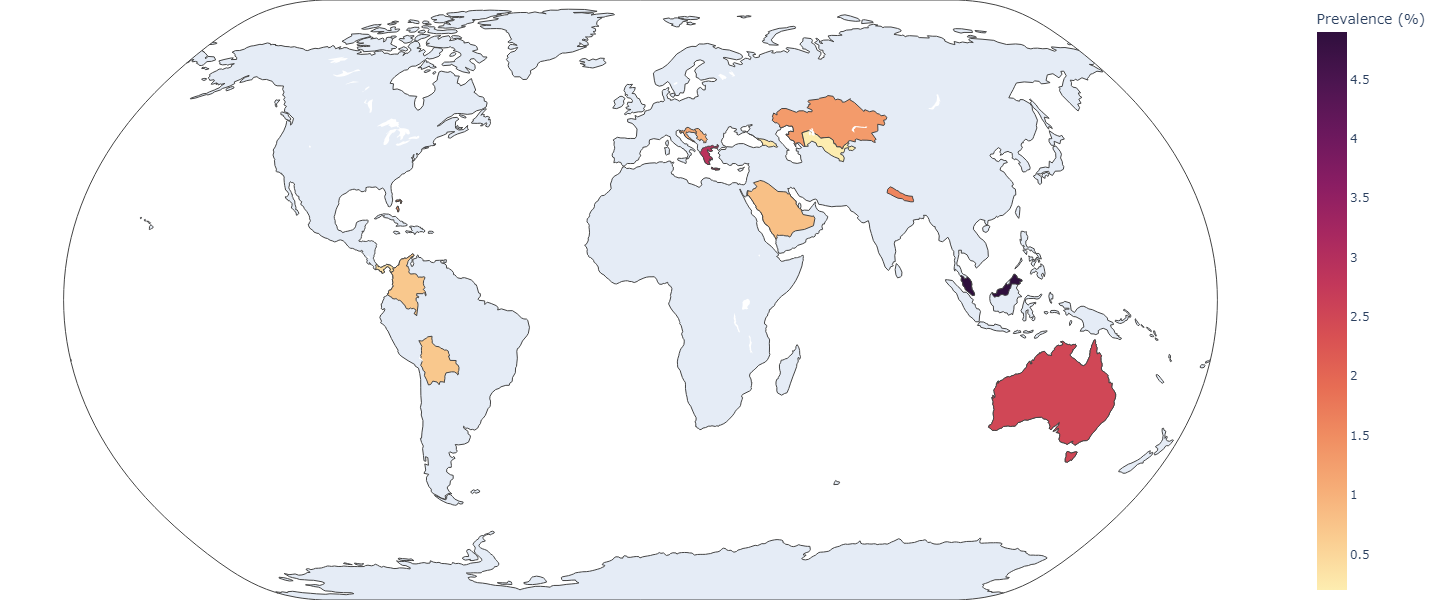

In [262]:
# https://plotly.com/python/choropleth-maps/
import plotly.express as px

fig = px.choropleth(adult_ecig_btsx_2019_df2, locations="Country",
                    color="Prevalence (%)", 
                    hover_data = ['Country','ParentLocation','Prevalence (%)'],
                    color_continuous_scale=px.colors.sequential.matter,
                    projection='natural earth'
                    # title='Countries with recorded adult e-cigarette use in 2019'
                    )
# https://stackoverflow.com/questions/63466163/how-to-enlarge-geographic-map-in-python-plotly-choropleth-plot
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  width=1200, 
                  height=600)
print('Countries with recorded adult e-cigarette use in 2019 (datasource: World Health Organisation)')
fig.show()

In [85]:
# Pull in youth data - daily
indicator_name2 = 'Yth_daily_e-cig'
response2 = requests.get(base_url + indicator_name2)
response2

<Response [200]>

In [86]:
# Get data in json format
yth_dly_ecig = response2.json()
pprint(yth_dly_ecig)

{'@odata.context': 'https://ghoapi.azureedge.net/api/$metadata#Yth_daily_e-cig',
 'value': [{'Comments': None,
            'DataSourceDim': None,
            'DataSourceDimType': None,
            'Date': '2023-12-11T15:24:40+01:00',
            'Dim1': 'SEX_MLE',
            'Dim1Type': 'SEX',
            'Dim2': None,
            'Dim2Type': None,
            'Dim3': None,
            'Dim3Type': None,
            'High': None,
            'Id': 3866401,
            'IndicatorCode': 'Yth_daily_e-cig',
            'Low': None,
            'NumericValue': None,
            'ParentLocation': 'Europe',
            'ParentLocationCode': 'EUR',
            'SpatialDim': 'MNE',
            'SpatialDimType': 'COUNTRY',
            'TimeDim': 2019,
            'TimeDimType': 'YEAR',
            'TimeDimensionBegin': '2019-01-01T00:00:00+01:00',
            'TimeDimensionEnd': '2019-12-31T00:00:00+01:00',
            'TimeDimensionValue': '2019',
            'Value': 'Data not available'},
   

In [87]:
# Get data and create dataframe
yth_dly_ecig_data = yth_dly_ecig['value']
yth_dly_ecig_df = pd.DataFrame(yth_dly_ecig_data)
yth_dly_ecig_df

In [206]:
yth_dly_ecig_df_clean = yth_dly_ecig_df[yth_dly_ecig_df['NumericValue'].notna()]
yth_dly_ecig_df_clean

yth_dly_ecig_df_sort = yth_dly_ecig_df_clean.sort_values(['SpatialDim', 'TimeDim']).head(20)
yth_dly_ecig_df_sort2 = yth_dly_ecig_df_sort[['SpatialDim','ParentLocation','Dim1','TimeDim','NumericValue']]

In [90]:
# Pull in adult data - daily
indicator_name3 = 'Adult_daily_e-cig'
response3 = requests.get(base_url + indicator_name3)
response3
# Get data in json format
adult_dly_ecig = response3.json()
pprint(adult_dly_ecig)

{'@odata.context': 'https://ghoapi.azureedge.net/api/$metadata#Adult_daily_e-cig',
 'value': [{'Comments': None,
            'DataSourceDim': None,
            'DataSourceDimType': None,
            'Date': '2023-12-07T16:57:14+01:00',
            'Dim1': 'SEX_MLE',
            'Dim1Type': 'SEX',
            'Dim2': None,
            'Dim2Type': None,
            'Dim3': None,
            'Dim3Type': None,
            'High': None,
            'Id': 2080691,
            'IndicatorCode': 'Adult_daily_e-cig',
            'Low': None,
            'NumericValue': None,
            'ParentLocation': 'Europe',
            'ParentLocationCode': 'EUR',
            'SpatialDim': 'BLR',
            'SpatialDimType': 'COUNTRY',
            'TimeDim': 2020,
            'TimeDimType': 'YEAR',
            'TimeDimensionBegin': '2020-01-01T00:00:00+01:00',
            'TimeDimensionEnd': '2020-12-31T00:00:00+01:00',
            'TimeDimensionValue': '2020',
            'Value': 'Data not available'},

In [91]:
# Get data and create dataframe
adult_dly_ecig_data = adult_dly_ecig['value']
adult_dly_ecig_df = pd.DataFrame(adult_dly_ecig_data)
adult_dly_ecig_df

,Id,IndicatorCode,SpatialDimType,SpatialDim,ParentLocationCode,TimeDimType,ParentLocation,Dim1Type,Dim1,TimeDim,Dim2Type,Dim2,Dim3Type,Dim3,DataSourceDimType,DataSourceDim,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
0,2080691,Adult_daily_e-cig,COUNTRY,BLR,EUR,YEAR,Europe,SEX,SEX_MLE,2020,None,None,None,None,None,None,Data not available,NaN,None,None,None,2023-12-07T16:57:14+01:00,2020,2020-01-01T00:00:00+01:00,2020-12-31T00:00:00+01:00
1,5168671,Adult_daily_e-cig,COUNTRY,MDA,EUR,YEAR,Europe,SEX,SEX_MLE,2021,None,None,None,None,None,None,0.4,0.4,None,None,None,2023-12-07T16:56:45+01:00,2021,2021-01-01T00:00:00+01:00,2021-12-31T00:00:00+01:00
2,2471205,Adult_daily_e-cig,COUNTRY,ROU,EUR,YEAR,Europe,SEX,SEX_FMLE,2019,None,None,None,None,None,None,0.2,0.2,None,None,None,2023-12-07T16:57:05+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00
3,2532375,Adult_daily_e-cig,COUNTRY,MYS,WPR,YEAR,Western Pacific,SEX,SEX_FMLE,2019,None,None,None,None,None,None,Data not available,NaN,None,None,None,2023-12-07T16:57:14+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00
4,3776989,Adult_daily_e-cig,COUNTRY,SWZ,AFR,YEAR,Africa,SEX,SEX_FMLE,2014,None,None,None,None,None,None,Data not available,NaN,None,None,None,2023-12-07T16:57:01+01:00,2014,2014-01-01T00:00:00+01:00,2014-12-31T00:00:00+01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,1963111,Adult_daily_e-cig,COUNTRY,BGD,SEAR,YEAR,South-East Asia,SEX,SEX_MLE,2018,None,None,None,None,None,None,Data not available,NaN,None,None,None,2023-12-07T16:57:11+01:00,2018,2018-01-01T00:00:00+01:00,2018-12-31T00:00:00+01:00
443,2692938,Adult_daily_e-cig,COUNTRY,AFG,EMR,YEAR,Eastern Mediterranean,SEX,SEX_BTSX,2019,None,None,None,None,None,None,Data not available,NaN,None,None,None,2023-12-07T16:57:01+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00
444,303125,Adult_daily_e-cig,COUNTRY,AUS,WPR,YEAR,Western Pacific,SEX,SEX_MLE,2019,None,None,None,None,None,None,Data not available,NaN,None,None,None,2023-12-07T16:56:58+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00
445,6100054,Adult_daily_e-cig,COUNTRY,LCA,AMR,YEAR,Americas,SEX,SEX_FMLE,2019,None,None,None,None,None,None,Data not available,NaN,None,None,None,2023-12-07T16:57:01+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00


In [92]:
adult_dly_ecig_df_clean = adult_dly_ecig_df[adult_dly_ecig_df['NumericValue'].notna()]
adult_dly_ecig_df_clean

adult_dly_ecig_df_clean.sort_values(['SpatialDim', 'TimeDim']).head(20)

,Id,IndicatorCode,SpatialDimType,SpatialDim,ParentLocationCode,TimeDimType,ParentLocation,Dim1Type,Dim1,TimeDim,Dim2Type,Dim2,Dim3Type,Dim3,DataSourceDimType,DataSourceDim,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
63,2961571,Adult_daily_e-cig,COUNTRY,ARE,EMR,YEAR,Eastern Mediterranean,SEX,SEX_FMLE,2018,None,None,None,None,None,None,0.1,0.1,None,None,None,2023-12-07T16:56:49+01:00,2017-2018,2017-01-01T00:00:00+01:00,2018-12-31T00:00:00+01:00
251,5214713,Adult_daily_e-cig,COUNTRY,ARE,EMR,YEAR,Eastern Mediterranean,SEX,SEX_BTSX,2018,None,None,None,None,None,None,0.3,0.3,None,None,None,2023-12-07T16:56:49+01:00,2017-2018,2017-01-01T00:00:00+01:00,2018-12-31T00:00:00+01:00
334,2505342,Adult_daily_e-cig,COUNTRY,ARE,EMR,YEAR,Eastern Mediterranean,SEX,SEX_MLE,2018,None,None,None,None,None,None,0.5,0.5,None,None,None,2023-12-07T16:57:05+01:00,2017-2018,2017-01-01T00:00:00+01:00,2018-12-31T00:00:00+01:00
287,4965395,Adult_daily_e-cig,COUNTRY,AUS,WPR,YEAR,Western Pacific,SEX,SEX_BTSX,2019,None,None,None,None,None,None,1.1,1.1,None,None,None,2023-12-07T16:56:49+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00
111,5116376,Adult_daily_e-cig,COUNTRY,AUT,EUR,YEAR,Europe,SEX,SEX_BTSX,2020,None,None,None,None,None,None,0.9,0.9,None,None,None,2023-12-07T16:57:05+01:00,2020,2020-01-01T00:00:00+01:00,2020-12-31T00:00:00+01:00
136,1015103,Adult_daily_e-cig,COUNTRY,AUT,EUR,YEAR,Europe,SEX,SEX_MLE,2020,None,None,None,None,None,None,1.3,1.3,None,None,None,2023-12-07T16:57:05+01:00,2020,2020-01-01T00:00:00+01:00,2020-12-31T00:00:00+01:00
146,5031087,Adult_daily_e-cig,COUNTRY,AUT,EUR,YEAR,Europe,SEX,SEX_FMLE,2020,None,None,None,None,None,None,0.5,0.5,None,None,None,2023-12-07T16:56:54+01:00,2020,2020-01-01T00:00:00+01:00,2020-12-31T00:00:00+01:00
44,4580430,Adult_daily_e-cig,COUNTRY,BEL,EUR,YEAR,Europe,SEX,SEX_BTSX,2021,None,None,None,None,None,None,3,3.0,None,None,None,2023-12-07T16:56:45+01:00,2021,2021-01-01T00:00:00+01:00,2021-12-31T00:00:00+01:00
340,635984,Adult_daily_e-cig,COUNTRY,BEL,EUR,YEAR,Europe,SEX,SEX_MLE,2021,None,None,None,None,None,None,3,3.0,None,None,None,2023-12-07T16:56:45+01:00,2021,2021-01-01T00:00:00+01:00,2021-12-31T00:00:00+01:00
358,6685226,Adult_daily_e-cig,COUNTRY,BEL,EUR,YEAR,Europe,SEX,SEX_FMLE,2021,None,None,None,None,None,None,3,3.0,None,None,None,2023-12-07T16:56:45+01:00,2021,2021-01-01T00:00:00+01:00,2021-12-31T00:00:00+01:00


In [93]:
# create a group using groupby 
adult_dly_ecig_group = adult_dly_ecig_df_clean.groupby("SpatialDim") 
  
# count the observations 
adult_dly_ecig_group.count()

,Id,IndicatorCode,SpatialDimType,ParentLocationCode,TimeDimType,ParentLocation,Dim1Type,Dim1,TimeDim,Dim2Type,Dim2,Dim3Type,Dim3,DataSourceDimType,DataSourceDim,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
SpatialDim,,,,,,,,,,,,,,,,,,,,,,,,
ARE,3,3,3,3,3,3,3,3,3,0,0,0,0,0,0,3,3,0,0,0,3,3,3,3
AUS,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,1,1
AUT,3,3,3,3,3,3,3,3,3,0,0,0,0,0,0,3,3,0,0,0,3,3,3,3
BEL,3,3,3,3,3,3,3,3,3,0,0,0,0,0,0,3,3,0,0,0,3,3,3,3
BRN,3,3,3,3,3,3,3,3,3,0,0,0,0,0,0,3,3,0,0,0,3,3,3,3
CAN,3,3,3,3,3,3,3,3,3,0,0,0,0,0,0,3,3,0,0,0,3,3,3,3
CHE,3,3,3,3,3,3,3,3,3,0,0,0,0,0,0,3,3,0,0,0,3,3,3,3
CHL,3,3,3,3,3,3,3,3,3,0,0,0,0,0,0,3,3,0,0,0,3,3,3,3
CYP,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,1,1


In [173]:
# adult_dly_ecig_group['Id']

adult_dly_ecig_group = adult_dly_ecig_df_clean.groupby(['SpatialDim']).size()
adult_dly_ecig_df = pd.DataFrame(adult_dly_ecig_group)
adult_dly_ecig_df
adult_dly_ecig_df = adult_dly_ecig_df.rename(columns={0: "CountObs"})
adult_dly_ecig_df

,CountObs
SpatialDim,
ARE,3
AUS,1
AUT,3
BEL,3
BRN,3
CAN,3
CHE,3
CHL,3
CYP,1


In [180]:
adult_dly_ecig_df_merge = pd.merge(adult_dly_ecig_df_clean,adult_dly_ecig_df, on='SpatialDim', how='left')
adult_dly_ecig_df_merge
adult_dly_ecig_df_merge2 = adult_dly_ecig_df_merge.sort_values(['SpatialDim'])
adult_dly_ecig_df_merge2

,Id,IndicatorCode,SpatialDimType,SpatialDim,ParentLocationCode,TimeDimType,ParentLocation,Dim1Type,Dim1,TimeDim,Dim2Type,Dim2,Dim3Type,Dim3,DataSourceDimType,DataSourceDim,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd,CountObs
39,5214713,Adult_daily_e-cig,COUNTRY,ARE,EMR,YEAR,Eastern Mediterranean,SEX,SEX_BTSX,2018,None,None,None,None,None,None,0.3,0.3,None,None,None,2023-12-07T16:56:49+01:00,2017-2018,2017-01-01T00:00:00+01:00,2018-12-31T00:00:00+01:00,3
13,2961571,Adult_daily_e-cig,COUNTRY,ARE,EMR,YEAR,Eastern Mediterranean,SEX,SEX_FMLE,2018,None,None,None,None,None,None,0.1,0.1,None,None,None,2023-12-07T16:56:49+01:00,2017-2018,2017-01-01T00:00:00+01:00,2018-12-31T00:00:00+01:00,3
51,2505342,Adult_daily_e-cig,COUNTRY,ARE,EMR,YEAR,Eastern Mediterranean,SEX,SEX_MLE,2018,None,None,None,None,None,None,0.5,0.5,None,None,None,2023-12-07T16:57:05+01:00,2017-2018,2017-01-01T00:00:00+01:00,2018-12-31T00:00:00+01:00,3
44,4965395,Adult_daily_e-cig,COUNTRY,AUS,WPR,YEAR,Western Pacific,SEX,SEX_BTSX,2019,None,None,None,None,None,None,1.1,1.1,None,None,None,2023-12-07T16:56:49+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00,1
22,1015103,Adult_daily_e-cig,COUNTRY,AUT,EUR,YEAR,Europe,SEX,SEX_MLE,2020,None,None,None,None,None,None,1.3,1.3,None,None,None,2023-12-07T16:57:05+01:00,2020,2020-01-01T00:00:00+01:00,2020-12-31T00:00:00+01:00,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,405638,Adult_daily_e-cig,COUNTRY,SVN,EUR,YEAR,Europe,SEX,SEX_FMLE,2021,None,None,None,None,None,None,0.4,0.4,None,None,None,2023-12-07T16:56:55+01:00,2021,2021-01-01T00:00:00+01:00,2021-12-31T00:00:00+01:00,3
49,5038836,Adult_daily_e-cig,COUNTRY,SWE,EUR,YEAR,Europe,SEX,SEX_MLE,2022,None,None,None,None,None,None,0.6,0.6,None,None,None,2023-12-07T16:56:55+01:00,2022,2022-01-01T00:00:00+01:00,2022-12-31T00:00:00+01:00,3
45,6369836,Adult_daily_e-cig,COUNTRY,SWE,EUR,YEAR,Europe,SEX,SEX_BTSX,2022,None,None,None,None,None,None,0.5,0.5,None,None,None,2023-12-07T16:56:49+01:00,2022,2022-01-01T00:00:00+01:00,2022-12-31T00:00:00+01:00,3
16,2012804,Adult_daily_e-cig,COUNTRY,SWE,EUR,YEAR,Europe,SEX,SEX_FMLE,2022,None,None,None,None,None,None,0.4,0.4,None,None,None,2023-12-07T16:57:05+01:00,2022,2022-01-01T00:00:00+01:00,2022-12-31T00:00:00+01:00,3


In [181]:
adult_dly_ecig_M_F = adult_dly_ecig_df_merge2.loc[(adult_dly_ecig_df_merge2['Dim1'] != 'SEX_BTSX')]
adult_dly_ecig_M_F2 = adult_dly_ecig_M_F.sort_values(['SpatialDim','Dim1'])
adult_dly_ecig_M_F2

,Id,IndicatorCode,SpatialDimType,SpatialDim,ParentLocationCode,TimeDimType,ParentLocation,Dim1Type,Dim1,TimeDim,Dim2Type,Dim2,Dim3Type,Dim3,DataSourceDimType,DataSourceDim,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd,CountObs
13,2961571,Adult_daily_e-cig,COUNTRY,ARE,EMR,YEAR,Eastern Mediterranean,SEX,SEX_FMLE,2018,None,None,None,None,None,None,0.1,0.1,None,None,None,2023-12-07T16:56:49+01:00,2017-2018,2017-01-01T00:00:00+01:00,2018-12-31T00:00:00+01:00,3
51,2505342,Adult_daily_e-cig,COUNTRY,ARE,EMR,YEAR,Eastern Mediterranean,SEX,SEX_MLE,2018,None,None,None,None,None,None,0.5,0.5,None,None,None,2023-12-07T16:57:05+01:00,2017-2018,2017-01-01T00:00:00+01:00,2018-12-31T00:00:00+01:00,3
23,5031087,Adult_daily_e-cig,COUNTRY,AUT,EUR,YEAR,Europe,SEX,SEX_FMLE,2020,None,None,None,None,None,None,0.5,0.5,None,None,None,2023-12-07T16:56:54+01:00,2020,2020-01-01T00:00:00+01:00,2020-12-31T00:00:00+01:00,3
22,1015103,Adult_daily_e-cig,COUNTRY,AUT,EUR,YEAR,Europe,SEX,SEX_MLE,2020,None,None,None,None,None,None,1.3,1.3,None,None,None,2023-12-07T16:57:05+01:00,2020,2020-01-01T00:00:00+01:00,2020-12-31T00:00:00+01:00,3
56,6685226,Adult_daily_e-cig,COUNTRY,BEL,EUR,YEAR,Europe,SEX,SEX_FMLE,2021,None,None,None,None,None,None,3,3.0,None,None,None,2023-12-07T16:56:45+01:00,2021,2021-01-01T00:00:00+01:00,2021-12-31T00:00:00+01:00,3
53,635984,Adult_daily_e-cig,COUNTRY,BEL,EUR,YEAR,Europe,SEX,SEX_MLE,2021,None,None,None,None,None,None,3,3.0,None,None,None,2023-12-07T16:56:45+01:00,2021,2021-01-01T00:00:00+01:00,2021-12-31T00:00:00+01:00,3
27,791362,Adult_daily_e-cig,COUNTRY,BRN,WPR,YEAR,Western Pacific,SEX,SEX_FMLE,2016,None,None,None,None,None,None,0.9,0.9,None,None,None,2023-12-07T16:57:05+01:00,2015-2016,2015-01-01T00:00:00+01:00,2016-12-31T00:00:00+01:00,3
62,2266753,Adult_daily_e-cig,COUNTRY,BRN,WPR,YEAR,Western Pacific,SEX,SEX_MLE,2016,None,None,None,None,None,None,9.1,9.1,None,None,None,2023-12-07T16:56:54+01:00,2015-2016,2015-01-01T00:00:00+01:00,2016-12-31T00:00:00+01:00,3
21,2585255,Adult_daily_e-cig,COUNTRY,CAN,AMR,YEAR,Americas,SEX,SEX_FMLE,2021,None,None,None,None,None,None,2,2.0,None,None,None,2023-12-07T16:56:55+01:00,2021,2021-01-01T00:00:00+01:00,2021-12-31T00:00:00+01:00,3
24,4015450,Adult_daily_e-cig,COUNTRY,CAN,AMR,YEAR,Americas,SEX,SEX_MLE,2021,None,None,None,None,None,None,3,3.0,None,None,None,2023-12-07T16:57:05+01:00,2021,2021-01-01T00:00:00+01:00,2021-12-31T00:00:00+01:00,3


In [182]:
adult_dly_ecig_all = adult_dly_ecig_M_F2.loc[(adult_dly_ecig_M_F2['CountObs']==3)]
adult_dly_ecig_all

,Id,IndicatorCode,SpatialDimType,SpatialDim,ParentLocationCode,TimeDimType,ParentLocation,Dim1Type,Dim1,TimeDim,Dim2Type,Dim2,Dim3Type,Dim3,DataSourceDimType,DataSourceDim,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd,CountObs
13,2961571,Adult_daily_e-cig,COUNTRY,ARE,EMR,YEAR,Eastern Mediterranean,SEX,SEX_FMLE,2018,None,None,None,None,None,None,0.1,0.1,None,None,None,2023-12-07T16:56:49+01:00,2017-2018,2017-01-01T00:00:00+01:00,2018-12-31T00:00:00+01:00,3
51,2505342,Adult_daily_e-cig,COUNTRY,ARE,EMR,YEAR,Eastern Mediterranean,SEX,SEX_MLE,2018,None,None,None,None,None,None,0.5,0.5,None,None,None,2023-12-07T16:57:05+01:00,2017-2018,2017-01-01T00:00:00+01:00,2018-12-31T00:00:00+01:00,3
23,5031087,Adult_daily_e-cig,COUNTRY,AUT,EUR,YEAR,Europe,SEX,SEX_FMLE,2020,None,None,None,None,None,None,0.5,0.5,None,None,None,2023-12-07T16:56:54+01:00,2020,2020-01-01T00:00:00+01:00,2020-12-31T00:00:00+01:00,3
22,1015103,Adult_daily_e-cig,COUNTRY,AUT,EUR,YEAR,Europe,SEX,SEX_MLE,2020,None,None,None,None,None,None,1.3,1.3,None,None,None,2023-12-07T16:57:05+01:00,2020,2020-01-01T00:00:00+01:00,2020-12-31T00:00:00+01:00,3
56,6685226,Adult_daily_e-cig,COUNTRY,BEL,EUR,YEAR,Europe,SEX,SEX_FMLE,2021,None,None,None,None,None,None,3,3.0,None,None,None,2023-12-07T16:56:45+01:00,2021,2021-01-01T00:00:00+01:00,2021-12-31T00:00:00+01:00,3
53,635984,Adult_daily_e-cig,COUNTRY,BEL,EUR,YEAR,Europe,SEX,SEX_MLE,2021,None,None,None,None,None,None,3,3.0,None,None,None,2023-12-07T16:56:45+01:00,2021,2021-01-01T00:00:00+01:00,2021-12-31T00:00:00+01:00,3
27,791362,Adult_daily_e-cig,COUNTRY,BRN,WPR,YEAR,Western Pacific,SEX,SEX_FMLE,2016,None,None,None,None,None,None,0.9,0.9,None,None,None,2023-12-07T16:57:05+01:00,2015-2016,2015-01-01T00:00:00+01:00,2016-12-31T00:00:00+01:00,3
62,2266753,Adult_daily_e-cig,COUNTRY,BRN,WPR,YEAR,Western Pacific,SEX,SEX_MLE,2016,None,None,None,None,None,None,9.1,9.1,None,None,None,2023-12-07T16:56:54+01:00,2015-2016,2015-01-01T00:00:00+01:00,2016-12-31T00:00:00+01:00,3
21,2585255,Adult_daily_e-cig,COUNTRY,CAN,AMR,YEAR,Americas,SEX,SEX_FMLE,2021,None,None,None,None,None,None,2,2.0,None,None,None,2023-12-07T16:56:55+01:00,2021,2021-01-01T00:00:00+01:00,2021-12-31T00:00:00+01:00,3
24,4015450,Adult_daily_e-cig,COUNTRY,CAN,AMR,YEAR,Americas,SEX,SEX_MLE,2021,None,None,None,None,None,None,3,3.0,None,None,None,2023-12-07T16:57:05+01:00,2021,2021-01-01T00:00:00+01:00,2021-12-31T00:00:00+01:00,3


In [183]:
min_year = adult_dly_ecig_all['TimeDim'].min()
max_year = adult_dly_ecig_all['TimeDim'].max()
print(f"{min_year}, {max_year}")

2016, 2022


In [187]:
adult_dly_ecig_M_F_df = adult_dly_ecig_all[['SpatialDim', 'ParentLocation', 'Dim1', 'TimeDim', 'NumericValue']]
adult_dly_ecig_M_F_df2 = adult_dly_ecig_M_F_df.rename(columns={'SpatialDim' : 'Country',
                                              'ParentLocation' : 'Region',
                                              'Dim1' : 'Sex',
                                              'TimeDim' : 'Year',
                                              'NumericValue': 'Prevalence (%)'
                                             })
adult_dly_ecig_M_F_sort = adult_dly_ecig_M_F_df2.sort_values(['Country', 'Sex'])
adult_dly_ecig_M_F_sort

,Country,Region,Sex,Year,Prevalence (%)
13,ARE,Eastern Mediterranean,SEX_FMLE,2018,0.1
51,ARE,Eastern Mediterranean,SEX_MLE,2018,0.5
23,AUT,Europe,SEX_FMLE,2020,0.5
22,AUT,Europe,SEX_MLE,2020,1.3
56,BEL,Europe,SEX_FMLE,2021,3.0
53,BEL,Europe,SEX_MLE,2021,3.0
27,BRN,Western Pacific,SEX_FMLE,2016,0.9
62,BRN,Western Pacific,SEX_MLE,2016,9.1
21,CAN,Americas,SEX_FMLE,2021,2.0
24,CAN,Americas,SEX_MLE,2021,3.0


In [189]:
# Side by side bar plot
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
Countries = list(adult_dly_ecig_M_F_sort['Country'].unique())
print(Countries)

Female_data = list(adult_dly_ecig_M_F_sort['Prevalence (%)'].loc[(adult_dly_ecig_M_F_sort['Sex']=='SEX_FMLE')])
print(Female_data)

Male_data = list(adult_dly_ecig_M_F_sort['Prevalence (%)'].loc[(adult_dly_ecig_M_F_sort['Sex']=='SEX_MLE')])
print(Male_data)

['ARE', 'AUT', 'BEL', 'BRN', 'CAN', 'CHE', 'CHL', 'CZE', 'GBR', 'HRV', 'IDN', 'KAZ', 'LTU', 'MDA', 'NZL', 'ROU', 'SLV', 'SVN', 'SWE']
[0.1, 0.5, 3.0, 0.9, 2.0, 1.7, 0.3, 3.5, 3.5, 0.5, 0.0, 0.2, 2.3, 0.2, 5.0, 0.2, 0.1, 0.4, 0.4]
[0.5, 1.3, 3.0, 9.1, 3.0, 1.8, 0.9, 4.5, 6.4, 1.1, 0.6, 0.4, 3.1, 0.4, 7.5, 0.5, 1.3, 0.9, 0.6]


In [190]:
M_F_adult_dly_prevalence = pd.DataFrame({'Country': Countries,
    'Female': Female_data,
    'Male': Male_data,
})
M_F_adult_dly_prevalence

,Country,Female,Male
0,ARE,0.1,0.5
1,AUT,0.5,1.3
2,BEL,3.0,3.0
3,BRN,0.9,9.1
4,CAN,2.0,3.0
5,CHE,1.7,1.8
6,CHL,0.3,0.9
7,CZE,3.5,4.5
8,GBR,3.5,6.4
9,HRV,0.5,1.1


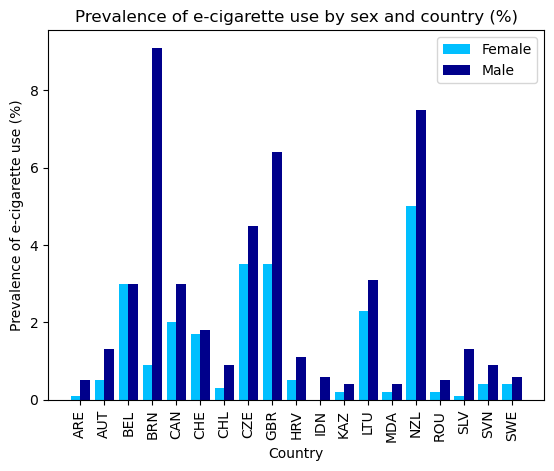

In [205]:
# https://www.geeksforgeeks.org/create-a-grouped-bar-plot-in-matplotlib/
x = np.arange(len(Countries))
width = 0.40
plt.bar(x-0.2, Female_data, width, color='deepskyblue')
plt.bar(x+0.2, Male_data, width, color='darkblue')
plt.xticks(x, Countries, rotation=90)
plt.xlabel('Country')
plt.ylabel('Prevalence of e-cigarette use (%)')
plt.title('Prevalence of e-cigarette use by sex and country (%)')
plt.legend(["Female", "Male"]) 

plt.show()
